## Import thư viện và đọc dữ liệu
Trước tiên, chúng ta cần import các thư viện cần thiết và đọc dữ liệu.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc dữ liệu (giả sử bạn đã tải và lưu bộ dữ liệu thành file .csv)
file_path = "./gym_members_exercise_tracking.csv"
data = pd.read_csv(file_path)

# Kiểm tra dữ liệu ban đầu
print(data.head())


   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0              

## Xử lý giá trị thiếu
Tiếp theo, chúng ta cần xử lý các giá trị thiếu trong bộ dữ liệu bằng cách điền giá trị thiếu cho các cột số bằng giá trị trung bình.


In [2]:
# Kiểm tra các cột trong DataFrame
print(data.columns)

# Chọn các cột số (numeric columns)
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Điền giá trị thiếu cho các cột số bằng giá trị trung bình
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Kiểm tra lại dữ liệu sau khi điền giá trị thiếu
print(data.isnull().sum())


Index(['Age', 'Gender', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM',
       'Resting_BPM', 'Session_Duration (hours)', 'Calories_Burned',
       'Workout_Type', 'Fat_Percentage', 'Water_Intake (liters)',
       'Workout_Frequency (days/week)', 'Experience_Level', 'BMI'],
      dtype='object')
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


## Mã hóa các cột phân loại (categorical columns)
Dữ liệu phân loại cần được mã hóa. Ta sẽ sử dụng One-Hot Encoding để chuyển các giá trị phân loại thành các cột số.


In [3]:
# Mã hóa các cột phân loại bằng One-Hot Encoding
data = pd.get_dummies(data, columns=['Gender', 'Workout_Type'], drop_first=True)

# Kiểm tra lại bộ dữ liệu
print(data.head())


   Age  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56         88.3        1.71      180      157           60   
1   46         74.9        1.53      179      151           66   
2   32         68.1        1.66      167      122           54   
3   25         53.2        1.70      190      164           56   
4   38         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned  Fat_Percentage  \
0                      1.69           1313.0            12.6   
1                      1.30            883.0            33.9   
2                      1.11            677.0            33.4   
3                      0.59            532.0            28.8   
4                      0.64            556.0            29.2   

   Water_Intake (liters)  Workout_Frequency (days/week)  Experience_Level  \
0                    3.5                              4                 3   
1                    2.1                              4         

## Chia dữ liệu thành tập huấn luyện và kiểm tra
Chúng ta chia dữ liệu thành hai phần: tập huấn luyện (80%) và tập kiểm tra (20%).

In [4]:
# X là các đặc trưng (features), y là cột mục tiêu (target)
X = data.drop('Experience_Level', axis=1)  # Loại bỏ cột mục tiêu 'Experience_Level'
y = data['Experience_Level']  # Cột mục tiêu là 'Experience_Level'

# Chia dữ liệu thành 80% huấn luyện và 20% kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Kiểm tra kích thước của các tập dữ liệu
print(f"Train size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")


Train size: 778 | Test size: 195


## Chuẩn hóa dữ liệu
Thuật toán Naïve Bayes không yêu cầu chuẩn hóa dữ liệu, nhưng nó vẫn có thể hoạt động hiệu quả hơn với dữ liệu được chuẩn hóa. Do đó, ta sẽ chuẩn hóa các đặc trưng.

In [5]:
# Khởi tạo bộ chuẩn hóa
scaler = StandardScaler()

# Chuẩn hóa các đặc trưng
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Kiểm tra kết quả chuẩn hóa
print(X_train[:5])  # In ra 5 dòng đầu tiên của X_train sau khi chuẩn hóa


[[-1.53304512 -0.88120507 -0.97008833 -0.68108593  1.70030809  0.64940678
  -0.40374901  0.48828894 -0.16547852  0.93198659  0.7420429  -0.4972275
   0.93767108 -0.54665472 -0.6100279   1.82930826]
 [ 0.03035419 -0.61565746 -0.5824516  -1.54719389  1.63084945  0.1077413
  -0.99771086 -0.50711149  0.4109795  -1.56371867 -0.37030657 -0.37838126
  -1.06647205  1.82930826 -0.6100279  -0.54665472]
 [ 1.2646168   0.09563078 -0.03976017  1.22435159  0.72788721 -0.29850781
  -0.8492204  -0.86500827  0.21882682 -1.23095797 -0.37030657  0.1229061
  -1.06647205 -0.54665472 -0.6100279  -0.54665472]
 [-1.20390843 -0.69627013 -1.66783446  0.61807602  0.93626311  0.78482315
  -0.64133375 -0.3281631   1.06750113 -0.23267586 -1.48265605  0.16556885
  -1.06647205 -0.54665472 -0.6100279  -0.54665472]
 [-1.53304512 -0.38804522 -1.59030711  0.44485442 -1.14749592 -1.65267151
  -0.67103184 -0.93211392  0.47503039 -0.73181692  0.7420429   0.54343896
  -1.06647205 -0.54665472 -0.6100279   1.82930826]]


## Khởi tạo và huấn luyện mô hình Naïve Bayes
Bây giờ, chúng ta sẽ khởi tạo mô hình Gaussian Naïve Bayes và huấn luyện nó với dữ liệu huấn luyện.

In [6]:
# Khởi tạo mô hình Naïve Bayes
nb_model = GaussianNB()

# Huấn luyện mô hình với tập huấn luyện
nb_model.fit(X_train, y_train)

# Kiểm tra kết quả huấn luyện
print("Huấn luyện mô hình Naïve Bayes thành công!")


Huấn luyện mô hình Naïve Bayes thành công!


## Dự đoán và đánh giá mô hình
Sau khi huấn luyện mô hình, chúng ta sẽ dự đoán trên tập kiểm tra và đánh giá hiệu quả của mô hình bằng độ chính xác và ma trận nhầm lẫn.

Độ chính xác của mô hình Naïve Bayes: 0.89


<Figure size 800x600 with 0 Axes>

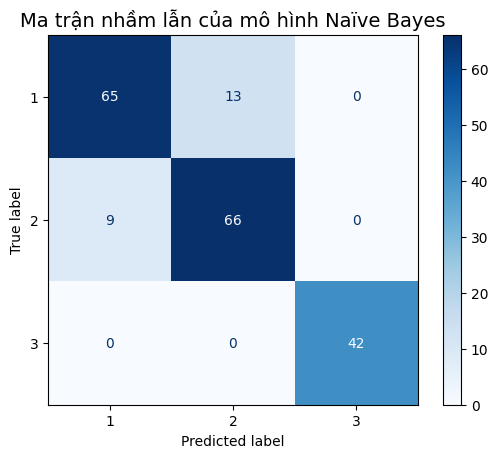

In [7]:
# Dự đoán trên tập kiểm tra
y_pred = nb_model.predict(X_test)

# Tính độ chính xác (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình Naïve Bayes: {accuracy:.2f}")

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Ma trận nhầm lẫn của mô hình Naïve Bayes', fontsize=14)
plt.show()